<b>Name:</b> Aishwarya Bhavsar<br>
<b>CSULBID:</b> 029371509<br>
CECS 551 Assignment 7

**Import Libraries And Download Dataset**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


**Normalize The Data And Convert It RGB To GRAYSCALE Image For Fast Training**

In [5]:
# Preprocessing the data

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
# Preprocessing the Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

**(a) Split the training dataset into sub training and validation sets randomly. Use 1/5 of training dataset as validation set. Use the ‘accuracy’ as metric. Please repeat 10 times of random split and aggregate (average) the accuracy**

In [11]:
# Spiltting training and validation sets

X_val = X_train[:10000]
y_val = y_train[:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

In [12]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

<b>(b) Model evaluation<br>
• Evaluate multiple combinations of activation function, optimizer, hyper-parameter,generalization (including data augmentation), and architecture.<br>
• Using sub training and validation datasets, find the best models.<br>
• Report 3 best models in terms of test accuracy.

<b>Define The Model</b>

In [13]:
# Building the model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

**Compile The Model**

In [14]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Creating the Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

<b>Data Augmentation</b>

In [1]:
#Setting up a data augmentation configuration via ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
fill_mode='nearest')

In [2]:

#Module with imagepreprocessing utilities
from keras.preprocessing import image

<b>Fit The Model</b>

In [16]:
# Training

history = model.fit(X_train, y_train, epochs = 16, batch_size = 32, validation_data = (X_val, y_val), callbacks = callback)

Epoch 1/16
1250/1250 [==============================] - 391s 311ms/step - loss: 1.5840 - accuracy: 0.4602 - val_loss: 1.0419 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 2/16
1250/1250 [==============================] - 387s 310ms/step - loss: 0.9831 - accuracy: 0.6571 - val_loss: 1.0392 - val_accuracy: 0.6545 - lr: 0.0010
Epoch 3/16
1250/1250 [==============================] - 388s 311ms/step - loss: 0.8097 - accuracy: 0.7207 - val_loss: 0.7412 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 4/16
1250/1250 [==============================] - 391s 313ms/step - loss: 0.7099 - accuracy: 0.7526 - val_loss: 0.7474 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 5/16
1250/1250 [==============================] - 391s 313ms/step - loss: 0.6365 - accuracy: 0.7809 - val_loss: 0.6650 - val_accuracy: 0.7739 - lr: 0.0010
Epoch 6/16
1250/1250 [==============================] - 391s 312ms/step - loss: 0.5775 - accuracy: 0.8004 - val_loss: 0.6497 - val_accuracy: 0.7811 - lr: 0.0010
Epoch 7/16
1250/1250 [============

<b>Training Accuracy</b><br>
<b>94.31%<b>

In [25]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1250/1250 [==============================] - 87s 69ms/step - loss: 0.1869 - accuracy: 0.9431
Accuracy: 94.31


<b>Test Accuracy</b><br>
<b>81.06%<b>

In [26]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 22s 69ms/step - loss: 0.5807 - accuracy: 0.8106
Accuracy: 81.06


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

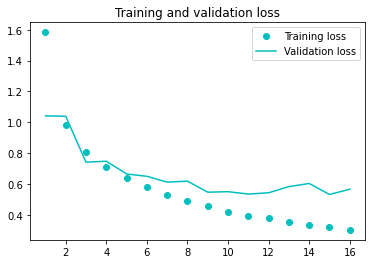

In [23]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()